IMPORTING THE LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [24]:
data = pd.read_csv('Social_Network_Ads.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

SPLITTING THE DATASET INTO TRAINING AND TEST SETS

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

FEATURE SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

TRAINING THE K-NN MODEL ON THE TRAINING SET

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

PREDICTING THE NEW RESULT

In [28]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


PREDICTING THE TEST SET RESULTS

In [29]:
ypred = classifier.predict(xtest)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


MAKING THE CONFUSION MATRIX

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm= confusion_matrix(ypred, ytest)
print("Confusion Matrix: \n",cm)
print('Accuracy Score: ',accuracy_score(ypred, ytest))

Confusion Matrix: 
 [[54  1]
 [ 4 21]]
Accuracy Score:  0.9375


VISUALISING THE TRAINING SET RESULTS

C:\Users\User\AppData\Local\Temp\ipykernel_2020\132840779.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


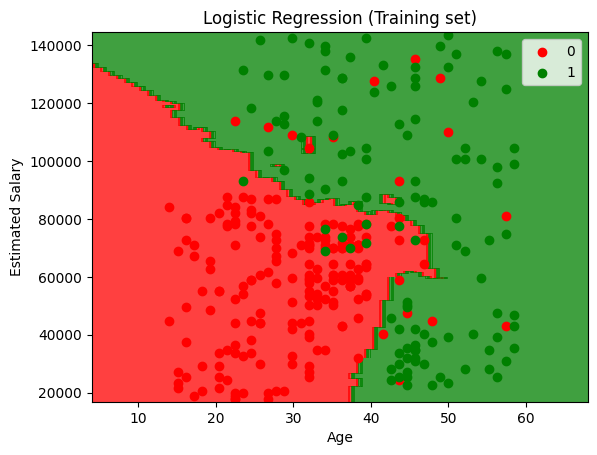

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(xtrain), ytrain
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

VISUALISING THE TEST SET RESULTS

C:\Users\User\AppData\Local\Temp\ipykernel_2020\4042157252.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


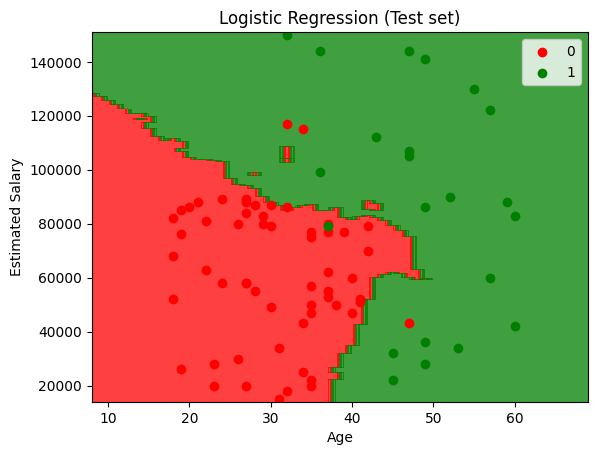

In [33]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(xtest), ytest
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))

Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
Z = Z.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()